# Prueba de corelación de Pearson y Spearman

**Author**: David Mesa
ds.mesa10@uniandes.edu.co

### Importación de librerias y data necesaria

In [30]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para comando de sistema
import os
# Librería para manejo de datos
import pandas as pd
#Librería para gráficos
import matplotlib.pyplot as plt

In [31]:
# cargar los datos en csv
data= pd.read_csv('listings_m2.csv', sep=';',encoding='latin-1', low_memory=False)

In [32]:
#visualizar los primeros registros para tener une mejor perpectiva de la información
data.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,"2,02104E+13",12/04/2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,"2,02104E+13",12/04/2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,"2,02104E+13",11/04/2021,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13
3,27886,https://www.airbnb.com/rooms/27886,"2,02104E+13",11/04/2021,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,0363 974D 4986 7411 88D8,t,1,0,1,0,1.94
4,28871,https://www.airbnb.com/rooms/28871,"2,02104E+13",13/04/2021,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.59


In [41]:
# Revisar los tipos de data en el archivo
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                        object
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

## Corelación de Pearson

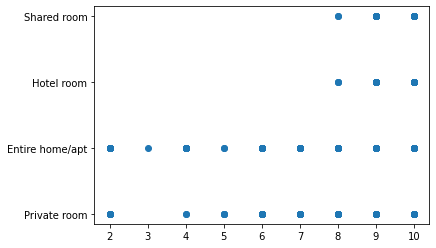

In [51]:
#Buscar las variables “review_scores_communication”, “review_scores_rating” y “room_type”
data2 = data[data['review_scores_communication']>0]
data3 = data2[data2['review_scores_rating']>0]
plt.scatter(data2['review_scores_communication'],data2['room_type'] );


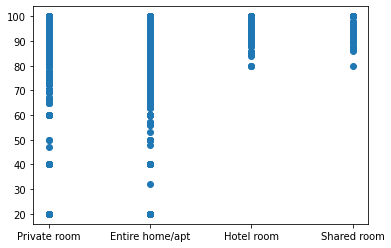

In [53]:
plt.scatter(data3['room_type'],data3['review_scores_rating'] );

In [54]:
data3[['review_scores_communication','review_scores_rating','room_type']].corr(method='pearson')

,review_scores_communication,review_scores_rating
review_scores_communication,1.000000,0.658239
review_scores_rating,0.658239,1.000000


### El grado de corelación lineal entre las variables es alto 0.6582

## Corelación de Spearman

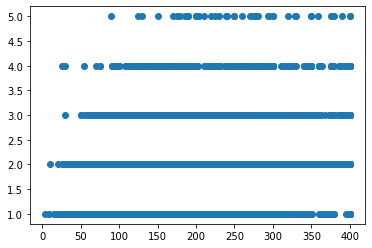

In [67]:
#Limpiamos valores nulos y en precio excluimos los valores mayores a 400 y en habitaciones los mayores a 5 que son los datos atípicos
data1 = data[data['price']>0]
data1 = data1[data1['price']<=400]
data1 = data1[data1['bedrooms']>0]
data1 = data1[data1['bedrooms']<=5]
#Hacemos el gráfico de dispersión
plt.scatter(data1['price'],data1['bedrooms'])

In [66]:
corr=data1[['price','bedrooms' ]].corr(method='spearman')
corr

,price,bedrooms
price,1.000000,0.474843
bedrooms,0.474843,1.000000


### Al observar la gráfica y calcular el coeficiente de Spearman (0.47), se observa que existe un grado de correlación entre ambas variables (en particular entre mayor es el precio, se ofrecen más habitaciones).

Aunque el coeficiente de correlación de Pearson entre las variables sea igual a 0.65, en este caso, se sugiere calcular el coeficiente de Spearman para poder determinar si en verdad puede existir un grado de correlación monótona más fuerte entre las variables “review_scores_communication” y “review_scores_rating” que no necesariamente sea lineal. 